In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

data = np.loadtxt('ВN_01.csv', delimiter=';', unpack=False)
X = data[:, :16]
y = data[:, 16:17]
y = y.reshape(64)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Нормализация (стандартизация данных)
mean_on_train = X_train.mean(axis = 0)
std_on_train = X_train.std(axis = 0)
X_train_scaled = (X_train - mean_on_train)/std_on_train
X_test_scaled = (X_test - mean_on_train)/std_on_train

from sklearn.linear_model import LogisticRegression
Lr1 = LogisticRegression(C = 1, penalty='l1', solver='liblinear', random_state=1)
Lr1.fit(X_train_scaled,y_train)
Lr2 = LogisticRegression(C = 1, penalty='l2', solver='liblinear', random_state=1)
Lr2.fit(X_train_scaled,y_train)

from sklearn.svm import LinearSVC
linear_svm_l1 = LinearSVC(C = 1, penalty="l1", dual=False)
linear_svm_l1.fit(X_train_scaled,y_train)
linear_svm_l2 = LinearSVC(C = 1, penalty="l2", dual=False)
linear_svm_l2.fit(X_train_scaled,y_train)

from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier(n_neighbors = 1, metric='minkowski', algorithm='ball_tree')
estimator.fit(X_train_scaled, y_train)

from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(random_state = 1, max_features=5, max_depth=3, min_samples_leaf=1)
Tree.fit(X_train_scaled, y_train)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=14, max_features=6, max_depth=2, min_samples_leaf=1, random_state=1)
forest.fit(X_train_scaled, y_train)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver="lbfgs", random_state = 1, activation='relu', alpha=0.001, max_iter=14, hidden_layer_sizes=14)
mlp.fit(X_train_scaled, y_train)

from sklearn.ensemble import GradientBoostingClassifier
boosting = GradientBoostingClassifier(random_state = 1, learning_rate=0.41, n_estimators=3, subsample=0.4)
boosting.fit(X_train_scaled, y_train)

from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler(copy=True, feature_range=(0,1))
MMS.fit(X_train)
X_train_scaled2 = MMS.transform(X_train)
X_test_scaled2 = MMS.transform(X_test)
multinomialnb = MultinomialNB(fit_prior=True, alpha=0.001)
multinomialnb.fit(X_train_scaled2, y_train)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)

In [27]:
import pandas as pd
params = ['method','train_score', 'test_score']
resuts = []
resuts.append(['LinearSVCL1', linear_svm_l1.score(X_train_scaled, y_train)*100, linear_svm_l1.score(X_test_scaled, y_test)*100])
resuts.append(['LinearSVCL2', linear_svm_l2.score(X_train_scaled, y_train)*100, linear_svm_l2.score(X_test_scaled, y_test)*100])
resuts.append(['LogisticRegressionL1', Lr1.score(X_train_scaled, y_train)*100, Lr1.score(X_test_scaled, y_test)*100])
resuts.append(['LogisticRegressionL2', Lr2.score(X_train_scaled, y_train)*100, Lr2.score(X_test_scaled, y_test)*100])
resuts.append(['KNeighborsClassifier', estimator.score(X_train_scaled, y_train)*100, estimator.score(X_test_scaled, y_test)*100])
resuts.append(['DecisionTreeClassifier', Tree.score(X_train_scaled, y_train)*100, Tree.score(X_test_scaled, y_test)*100])
resuts.append(['RandomForestClassifier', forest.score(X_train_scaled, y_train)*100, forest.score(X_test_scaled, y_test)*100])
resuts.append(['MLPClassifier', mlp.score(X_train_scaled, y_train)*100, mlp.score(X_test_scaled, y_test)*100])
resuts.append(['GradientBoostingClassifier', boosting.score(X_train_scaled, y_train)*100, boosting.score(X_test_scaled, y_test)*100])
resuts.append(['MultinomialNB', multinomialnb.score(X_train_scaled2, y_train)*100, multinomialnb.score(X_test_scaled2, y_test)*100])

np_resuts = np.array(resuts)
data_pd = pd.DataFrame(np_resuts)
data_pd.columns = params
display(data_pd)

,method,train_score,test_score
0,LinearSVCL1,100.0,100.0
1,LinearSVCL2,100.0,100.0
2,LogisticRegressionL1,100.0,100.0
3,LogisticRegressionL2,100.0,100.0
4,KNeighborsClassifier,100.0,100.0
5,DecisionTreeClassifier,100.0,100.0
6,RandomForestClassifier,100.0,100.0
7,MLPClassifier,100.0,100.0
8,GradientBoostingClassifier,100.0,100.0
9,MultinomialNB,100.0,100.0


In [28]:
import pandas as pd

resuts = []
y_test2 = y_test

#svc = np.array(np.around(linear_svm_l1.predict_proba(X_test_scaled), decimals=3))
#svcc = svc.reshape(2,16)
#svc2 = np.array(np.around(linear_svm_l2.predict_proba(X_test_scaled), decimals=3))
#svcc2 = svc.reshape(2,16)
lr1 = np.array(np.around(Lr1.predict_proba(X_test_scaled), decimals=3))
lrr1 = lr1.transpose()
lr2 = np.array(np.around(Lr2.predict_proba(X_test_scaled), decimals=3))
lrr2 = lr2.transpose()
est = np.array(np.around(estimator.predict_proba(X_test_scaled), decimals=3))
estt = est.transpose()
tre = np.array(np.around(Tree.predict_proba(X_test_scaled), decimals=3))
tree = tre.transpose()
frt = np.array(np.around(forest.predict_proba(X_test_scaled), decimals=3))
frtt = frt.transpose()
mlpa = np.array(np.around(mlp.predict_proba(X_test_scaled), decimals=3))
mlpaa = mlpa.transpose()
bst = np.array(np.around(boosting.predict_proba(X_test_scaled), decimals=3))
bstt = bst.transpose()
nb = np.array(np.around(multinomialnb.predict_proba(X_test_scaled2), decimals=3))
nbb = nb.transpose()

resuts.append(y_test2)
resuts.append(lrr1[0])
resuts.append(lrr2[0])
resuts.append(estt[0])
resuts.append(tree[0])
resuts.append(frtt[0])
resuts.append(mlpaa[0])
resuts.append(bstt[0])
resuts.append(nbb[0])


resuts.append(lrr1[1])
resuts.append(lrr2[1])
resuts.append(estt[1])
resuts.append(tree[1])
resuts.append(frtt[1])
resuts.append(mlpaa[1])
resuts.append(bstt[1])
resuts.append(nbb[1])


np_resuts = np.array(resuts)
data_pd = pd.DataFrame(np_resuts, index=['y_test','LogisticRegressionL1(=0)','LogisticRegressionL2(=0)','KNeighbors(=0)','DecisionTree(=0)','RandomForest(=0)', 'MLP(=0)','GradientBoosting(=0)', 'MultinomialNB(=0)',
                                                  'LogisticRegressionL1(=1)','LogisticRegressionL2(=1)','KNeighbors(=1)','DecisionTree(=1)','RandomForest(=1)', 'MLP(=1)','GradientBoosting(=1)', 'MultinomialNB(=1)'])
#data_pd.columns = params
display(data_pd)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
y_test,1.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,1.000
LogisticRegressionL1(=0),0.006,0.020,0.913,0.138,0.964,0.206,0.967,0.980,0.941,0.014,0.002,0.942,0.175,0.975,0.080,0.125
LogisticRegressionL2(=0),0.006,0.045,0.746,0.186,0.975,0.047,0.991,0.996,0.854,0.052,0.011,0.976,0.011,0.981,0.020,0.125
KNeighbors(=0),0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000
DecisionTree(=0),0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000
RandomForest(=0),0.000,0.000,0.557,0.286,0.977,0.167,0.938,0.977,0.977,0.111,0.000,0.977,0.214,0.726,0.141,0.000
MLP(=0),0.000,0.000,0.997,0.000,1.000,0.002,1.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.002
GradientBoosting(=0),0.132,0.132,0.685,0.064,0.876,0.064,0.876,0.876,0.876,0.132,0.132,0.876,0.132,0.876,0.132,0.132
MultinomialNB(=0),0.246,0.275,0.510,0.350,0.607,0.319,0.664,0.684,0.572,0.223,0.210,0.668,0.284,0.661,0.292,0.367
LogisticRegressionL1(=1),0.994,0.980,0.087,0.862,0.036,0.794,0.033,0.020,0.059,0.986,0.998,0.058,0.825,0.025,0.920,0.875


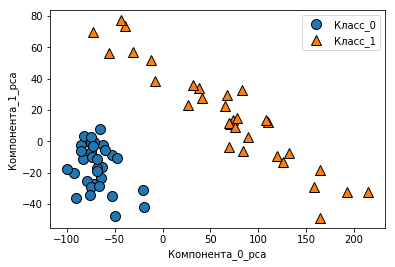

In [29]:
#------------------------------------------------------------------------

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

data = np.loadtxt('ВN_01.csv', delimiter=';', unpack=False)
X2 = data[:, :16]
y2 = data[:, 16:17]
y2 = y.reshape(64)

pca = PCA(n_components=2)
pca.fit(X2)
X_pca = pca.transform(X2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y2, random_state=42)

# Нормализация (стандартизация данных)
mean_on_train = X_train2.mean(axis = 0)
std_on_train = X_train2.std(axis = 0)
X_train_scaled2 = (X_train2 - mean_on_train)/std_on_train
X_test_scaled2 = (X_test2 - mean_on_train)/std_on_train

from sklearn.linear_model import LogisticRegression
Lr1_pca = LogisticRegression(C = 1, penalty='l1', solver='liblinear', random_state=1)
Lr1_pca.fit(X_train_scaled2,y_train2)
Lr2_pca = LogisticRegression(C = 1, penalty='l2', solver='liblinear', random_state=1)
Lr2_pca.fit(X_train_scaled2,y_train2)

from sklearn.svm import LinearSVC
linear_svm_l1_pca = LinearSVC(C = 1, penalty="l1", dual=False)
linear_svm_l1_pca.fit(X_train_scaled2,y_train2)
linear_svm_l2_pca = LinearSVC(C = 1, penalty="l2", dual=False)
linear_svm_l2_pca.fit(X_train_scaled2,y_train2)

from sklearn.neighbors import KNeighborsClassifier
estimator_pca = KNeighborsClassifier(n_neighbors = 1, metric='minkowski', algorithm='ball_tree')
estimator_pca.fit(X_train_scaled2, y_train2)

from sklearn.tree import DecisionTreeClassifier
Tree_pca = DecisionTreeClassifier(random_state = 1, max_features=2, max_depth=3, min_samples_leaf=1)
Tree_pca.fit(X_train_scaled2, y_train2)

from sklearn.ensemble import RandomForestClassifier
forest_pca = RandomForestClassifier(n_estimators=14, max_features=2, max_depth=2, min_samples_leaf=1, random_state=1)
forest_pca.fit(X_train_scaled2, y_train2)

from sklearn.neural_network import MLPClassifier
mlp_pca = MLPClassifier(solver="lbfgs", random_state = 1, activation='relu', alpha=0.001, max_iter=14, hidden_layer_sizes=14)
mlp_pca.fit(X_train_scaled2, y_train2)

from sklearn.ensemble import GradientBoostingClassifier
boosting_pca = GradientBoostingClassifier(random_state = 1, learning_rate=0.41, n_estimators=3, subsample=0.4)
boosting_pca.fit(X_train_scaled2, y_train2)

from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
MMS_pca = MinMaxScaler(copy=True, feature_range=(0,1))
MMS_pca.fit(X_train2)
X_train_scaled3 = MMS_pca.transform(X_train2)
X_test_scaled3 = MMS_pca.transform(X_test2)
multinomialnb_pca = MultinomialNB(fit_prior=True, alpha=0.00001)
multinomialnb_pca.fit(X_train_scaled3, y_train2)

import mglearn
import matplotlib.pyplot as plt
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], y2)
plt.xlabel("Компонента_0_pca")
plt.ylabel("Компонента_1_pca")
plt.legend(["Класс_0","Класс_1"])

In [30]:
import pandas as pd
params = ['method','train_score', 'test_score']
resuts = []
resuts.append(['LinearSVCL1_pca', linear_svm_l1_pca.score(X_train_scaled2, y_train2)*100, linear_svm_l1_pca.score(X_test_scaled2, y_test2)*100])
resuts.append(['LinearSVCL2_pca', linear_svm_l2_pca.score(X_train_scaled2, y_train2)*100, linear_svm_l2_pca.score(X_test_scaled2, y_test2)*100])
resuts.append(['LogisticRegressionL1_pca', Lr1_pca.score(X_train_scaled2, y_train2)*100, Lr1_pca.score(X_test_scaled2, y_test2)*100])
resuts.append(['LogisticRegressionL2_pca', Lr2_pca.score(X_train_scaled2, y_train2)*100, Lr2_pca.score(X_test_scaled2, y_test2)*100])
resuts.append(['KNeighborsClassifier_pca', estimator_pca.score(X_train_scaled2, y_train2)*100, estimator_pca.score(X_test_scaled2, y_test2)*100])
resuts.append(['DecisionTreeClassifier_pca', Tree_pca.score(X_train_scaled2, y_train2)*100, Tree_pca.score(X_test_scaled2, y_test2)*100])
resuts.append(['RandomForestClassifier_pca', forest_pca.score(X_train_scaled2, y_train2)*100, forest_pca.score(X_test_scaled2, y_test2)*100])
resuts.append(['MLPClassifier_pca', mlp_pca.score(X_train_scaled2, y_train2)*100, mlp_pca.score(X_test_scaled2, y_test2)*100])
resuts.append(['GradientBoostingClassifier_pca', np.around(boosting_pca.score(X_train_scaled2, y_train2)*100, decimals = 2), boosting_pca.score(X_test_scaled2, y_test2)*100])
resuts.append(['MultinomialNB_pca', np.around(multinomialnb_pca.score(X_train_scaled3, y_train2)*100, decimals = 2), multinomialnb_pca.score(X_test_scaled3, y_test2)*100])

np_resuts = np.array(resuts)
data_pd = pd.DataFrame(np_resuts)
data_pd.columns = params
display(data_pd)

,method,train_score,test_score
0,LinearSVCL1_pca,100.0,100.0
1,LinearSVCL2_pca,100.0,100.0
2,LogisticRegressionL1_pca,100.0,100.0
3,LogisticRegressionL2_pca,100.0,100.0
4,KNeighborsClassifier_pca,100.0,100.0
5,DecisionTreeClassifier_pca,100.0,100.0
6,RandomForestClassifier_pca,100.0,93.75
7,MLPClassifier_pca,100.0,100.0
8,GradientBoostingClassifier_pca,95.83,93.75
9,MultinomialNB_pca,83.33,62.5


[[5 2]
 [4 5]]


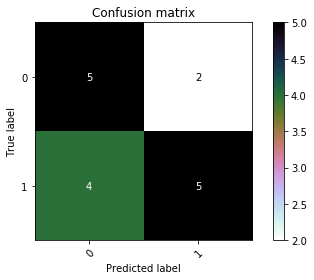

In [40]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

# y_pred = Lr1_pca.predict(X_test_scaled2)
# y_pred = boosting_pca.predict(X_test_scaled2)
# y_pred = forest_pca.predict(X_test_scaled2)
y_pred = multinomialnb_pca.predict(X_test_scaled2)




# Построение матрицы путаницы
def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.cubehelix_r):

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Confusion matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)


# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=[0,1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1.]


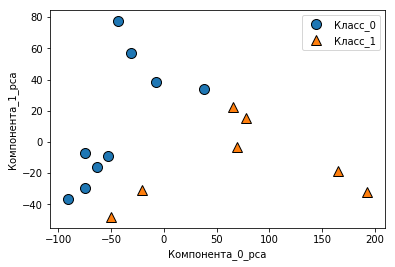

In [41]:
import mglearn
import matplotlib.pyplot as plt
print(y2)
print(y_pred)
mglearn.discrete_scatter(X_test2[:,0], X_test2[:,1], y_pred)
plt.xlabel("Компонента_0_pca")
plt.ylabel("Компонента_1_pca")
plt.legend(["Класс_0","Класс_1"])